<a href="https://colab.research.google.com/github/VISHVAPRASATHVS/DA_CLASSIFICATION/blob/main/Diabetes_Prediction_using_Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#diabities dataset
#Decision tree

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
d = pd.read_csv("/content/diabetes.csv")
d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
d.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
d.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
x = d.drop("Outcome", axis=1)
y = d["Outcome"]

In [8]:
x_test , x_train , y_test , y_train = train_test_split(x,y,test_size=0.2,random_state=2)

In [9]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [10]:
accuracy = model.score(x_test,y_test)
accuracy

0.6856677524429967

In [11]:
confusion_matrix(y_test,model.predict(x_test))

array([[303,  88],
       [105, 118]])

In [12]:
cf = classification_report(y_test,model.predict(x_test))
print(cf)

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       391
           1       0.57      0.53      0.55       223

    accuracy                           0.69       614
   macro avg       0.66      0.65      0.65       614
weighted avg       0.68      0.69      0.68       614



In [13]:
from sklearn.tree import export_graphviz
import graphviz

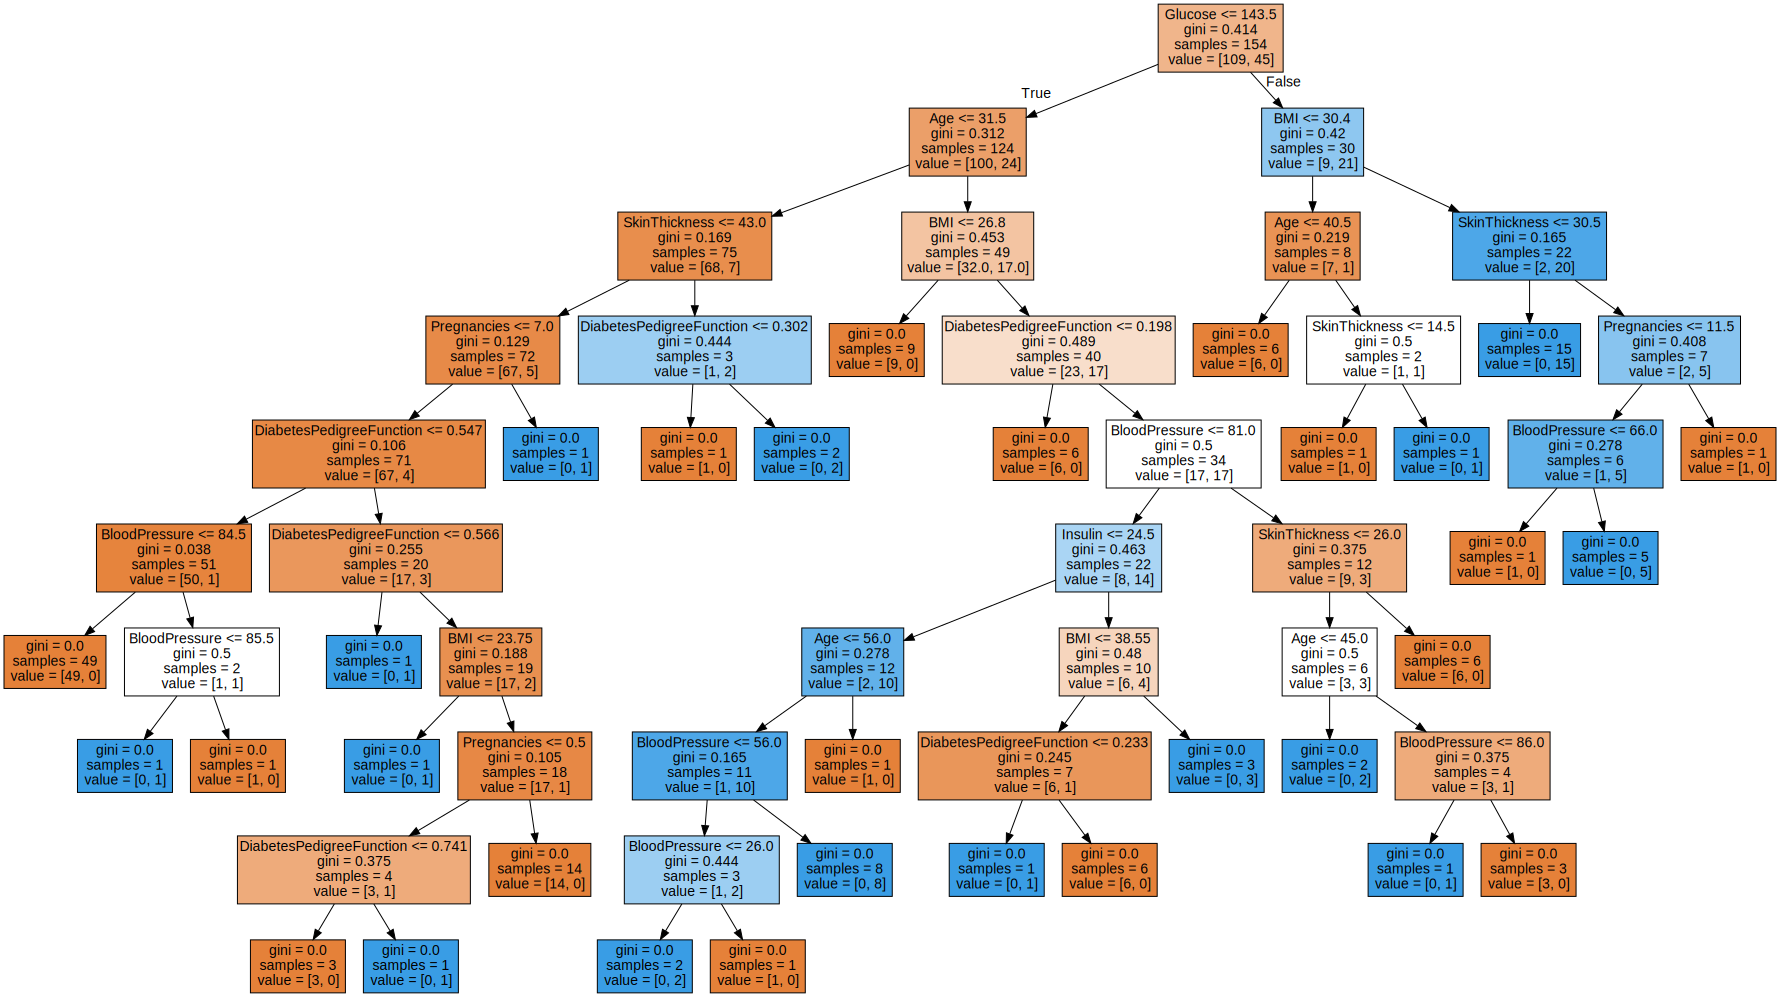

In [14]:
graphviz.Source(export_graphviz(model, out_file=None, feature_names=x.columns, filled=True))

In [15]:
a = DecisionTreeClassifier(criterion='entropy')
a.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [16]:
accuracy = a.score(x_test,y_test)
accuracy

0.7117263843648208

In [17]:
confusion_matrix(y_test,model.predict(x_test))

array([[303,  88],
       [105, 118]])

In [18]:
cf = classification_report(y_test,a.predict(x_test))
print(cf)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       391
           1       0.61      0.58      0.59       223

    accuracy                           0.71       614
   macro avg       0.69      0.68      0.69       614
weighted avg       0.71      0.71      0.71       614



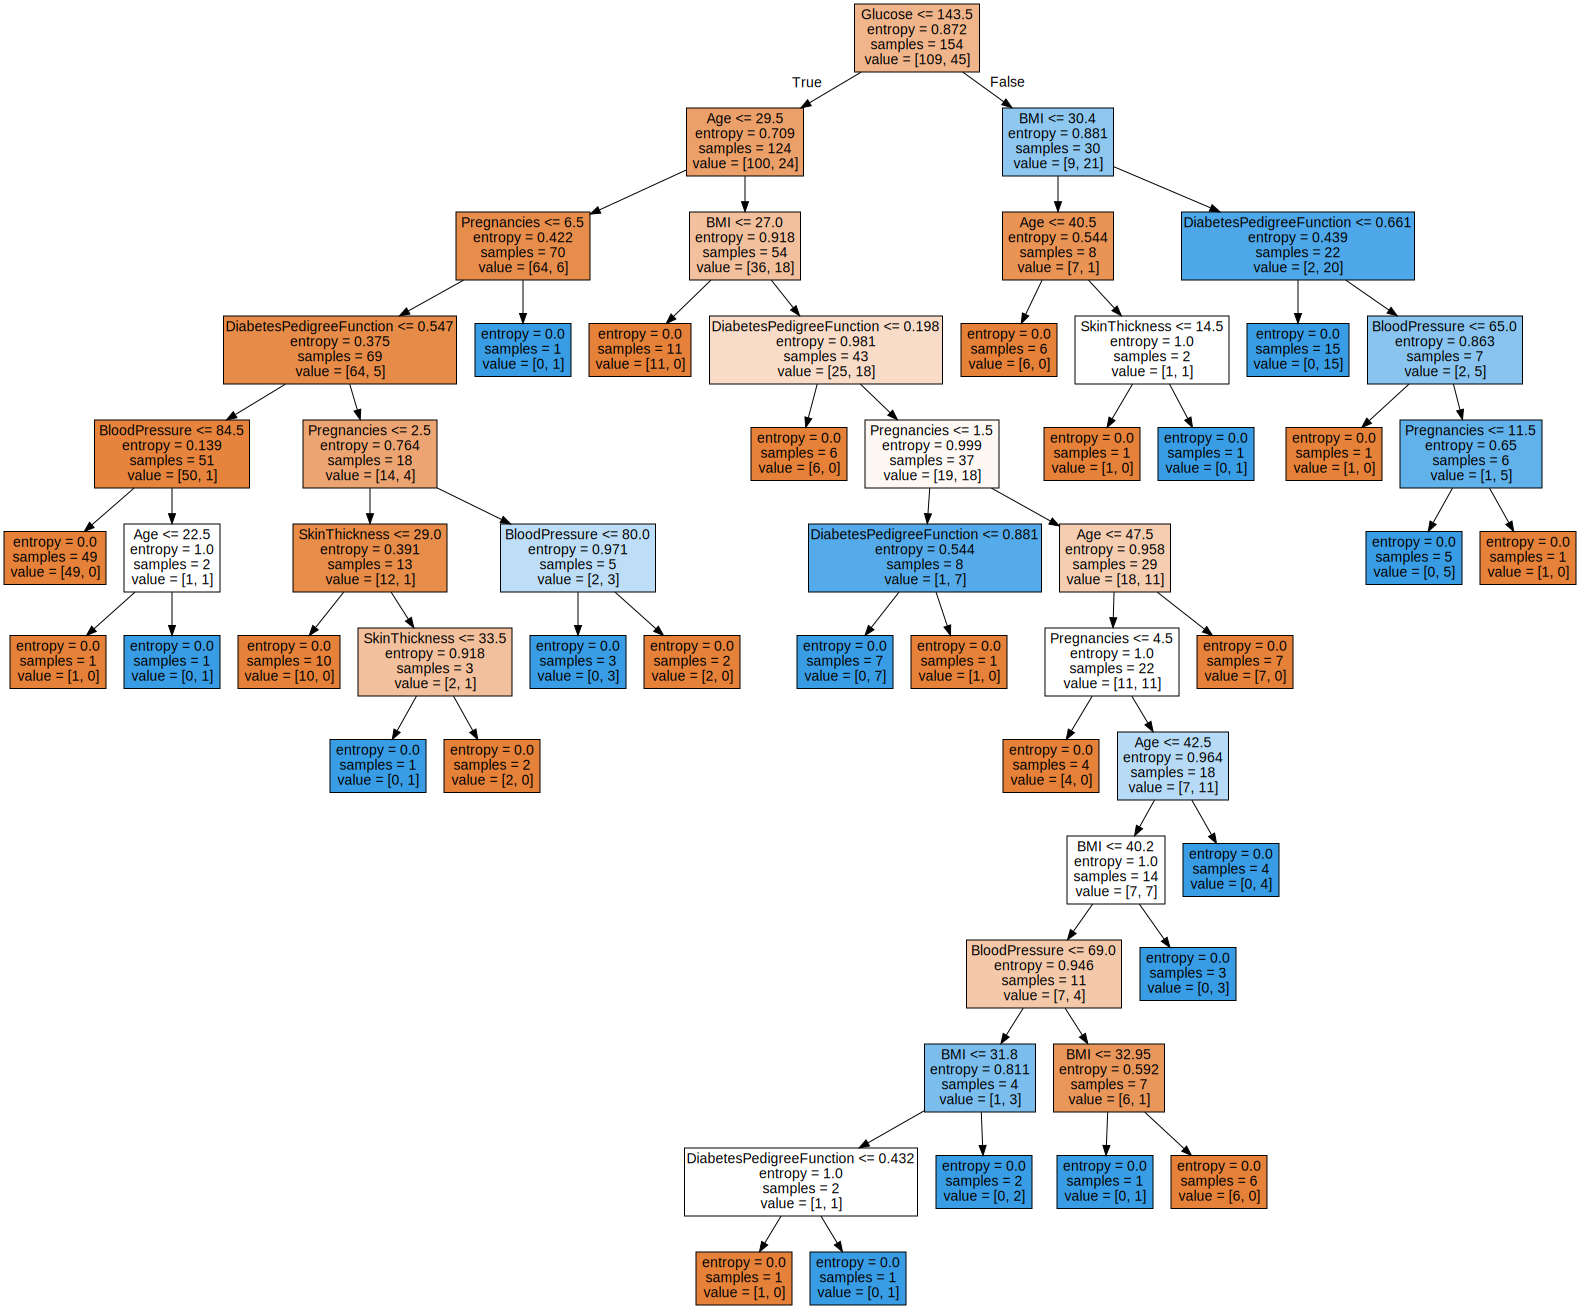

In [19]:
graphviz.Source(export_graphviz(a, out_file=None, feature_names=x.columns, filled=True))